# Relationship between IFS and the percent automatable

The following code shows the relatiionship between log$_{10}$(IFS) and the percent automatable, using graphs and linear regression. 

It is evident from initial graphs that this relationship is hard to ascertain when IFS is kept in the natural linear scale,
so we will log-transform it. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
d = pd.read_excel('~/Downloads/Injury Data 03-05-2019.xlsx')
d.columns = d.columns.str.lower()
d.columns = d.columns.str.replace(' ', '_')

In [3]:
d['logIFS'] = np.log10(d['injury_frequency_and_severity'])

Note that we don't lose any data when doing this transformation, since all the values of `injury_frequency_and_severity` are strictly positive.

# Plotting

/Users/abhijit/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


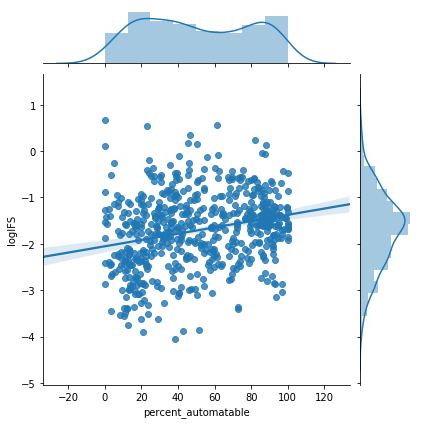

In [4]:
sns.jointplot(x = 'percent_automatable', y = 'logIFS', data = d, kind = 'reg');

# Modeling

In [5]:
X = d['percent_automatable']
X = sm.add_constant(X)
results = sm.OLS(d['logIFS'], X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 logIFS   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     37.67
Date:                Wed, 06 Mar 2019   Prob (F-statistic):           1.56e-09
Time:                        00:47:03   Log-Likelihood:                -682.34
No. Observations:                 582   AIC:                             1369.
Df Residuals:                     580   BIC:                             1377.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.0523    

In the above model, we find that `percent_automatable` has a coefficient of 0.007. Since we have modeled IFS on the log$_{10}$ scale, this now has a multiplicative interpretation. This model indicates that for every 1% increase in automatability, the IFS increases by a factor of $10^{0.007} = 1.016$, or 1.6%. So, for example, if automatability increases from 20% to 25%, we expect IFS to increase by a factor of $10^{0.007 \times 5} = 1.084$ or 8.4%.

In [6]:
results.pvalues

const                  1.366998e-129
percent_automatable     1.556656e-09
dtype: float64

The slope coefficient has a p-value of the order of 10$^{-9}$, which indicates high statistical significance. 